**Simple Linear Regression project** 

In this project we will predict the percentage of marks that a student is expected to score based upon the number of hours they have studied .

**Step 1:**

Let us import all libraries required for doing this project

In [77]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Step 2:**

The data is provided in a remote URL .
Let us read the data from the remote link.

In [78]:
data_url = "http://bit.ly/w-data"
students_data=pd.read_csv(data_url)
print("Students data imported successully")

Students data imported successully


**Step 3:**

Let us preview the data set of students

In [79]:
# Checking the number of rows and columns in the dataset
students_data.shape

(25, 2)

In [80]:
#Previewing the first 10 entries of dataset
students_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**Step 4:**

Let us visualize our dataset on a 2-D graph and see if there is any intuitive relationship between the data.

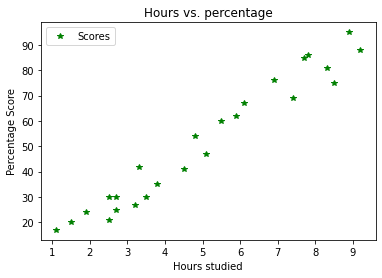

In [81]:
students_data.plot(x='Hours',y='Scores',style='*g')
plt.title('Hours vs. percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.show()

**From the visualization, we can clearly see there is a positive linear relation between the number of hours and percentage of score**

**Step 5:**

**Data preparation**

In [82]:
Attributes= students_data.iloc[:,:-1].values
Labels= students_data.iloc[:,1].values
print(Attributes)
print(Labels)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


**Splitting data into training and testing sets.**

In [95]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train , y_test =train_test_split(Attributes,Labels,test_size=0.25,random_state=0)

**Step 6:**

**Selecting and training the model**

In [96]:

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

print('Training the model successful')

Training the model successful


**Let us plot the regression line obtained from model**

In [97]:
m=model.coef_
c=model.intercept_
print("%f "% m )
print("%f "% c )

9.941678 
1.932204 


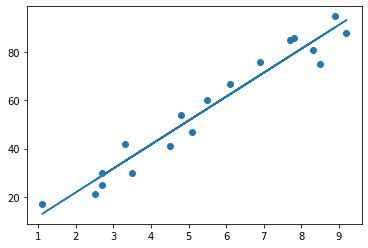

In [98]:
line = m*X_train + c
#Plotting line on the training data
plt.scatter(X_train,y_train)
plt.plot(X_train,line)
plt.show()

**Making Predictions on the test data**

In [99]:
#Testing data
print(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [100]:
#Predicted scores of Test data
y_pred = model.predict(X_test)

**Visualizing predicted score vs actual score of test data**

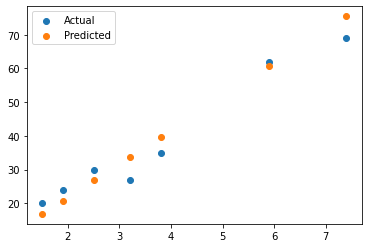

In [101]:
plt.scatter(X_test,y_test)
plt.scatter(X_test,y_pred)
plt.legend(["Actual","Predicted"])
plt.show()

**Comparing Actual vs Predicted**

In [102]:
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


**Let us predict with our own data**

In [103]:
hours = [[9.25]]
Score_pred = model.predict(hours)
print("Number of hours studied = {}".format(hours))
print("Predicted Score = {}".format(Score_pred))

Number of hours studied = [[9.25]]
Predicted Score = [93.89272889]


**Evaluating the model**


Let us evaluate the performance of our model .For our case let us use mean square error.

In [104]:
from sklearn import metrics 
error = metrics.mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error :",error)

Mean Absolute Error : 4.130879918502482
